# Data Exploration

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Aims-of-the-Capstone-Project:" data-toc-modified-id="The-Aims-of-the-Capstone-Project:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Aims of the Capstone Project:</a></span></li><li><span><a href="#Data-Dictionary:" data-toc-modified-id="Data-Dictionary:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Dictionary:</a></span></li><li><span><a href="#Import-Modules:" data-toc-modified-id="Import-Modules:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Modules:</a></span></li><li><span><a href="#Import-Data:" data-toc-modified-id="Import-Data:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import Data:</a></span></li><li><span><a href="#Examine-Data:" data-toc-modified-id="Examine-Data:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Examine Data:</a></span></li><li><span><a href="#Plot-Data:" data-toc-modified-id="Plot-Data:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plot Data:</a></span></li></ul></div>

### The Aims of the Capstone Project:

- To predict the number of ion channels open based on the signal

The signal is from a device which mesures the current flow from the ion channels oppening.

### Data Dictionary:

- "time" : The time from the start.
- "signal" : A small electrical current from the ion channels allowing charged ions to pass.
- "open_channels" : The number of open ion channels.

NB: The time data is from discrete batches of 50 seconds long 10 kHz samples (500,000 rows per batch).

### Import Modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Import Data:

In [2]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head(2)

,time,open_channels
0,500.0001,0
1,500.0002,0


In [3]:
test = pd.read_csv('test.csv')
test.head(2)

,time,signal
0,500.0001,-2.6498
1,500.0002,-2.8494


In [4]:
train = pd.read_csv('train.csv')
train.head(2)

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0


### Examine Data:

In [5]:
sample_submission.describe()

,time,open_channels
count,2.000000e+06,2000000.0
mean,6.000001e+02,0.0
std,5.773504e+01,0.0
min,5.000001e+02,0.0
25%,5.500001e+02,0.0
50%,6.000000e+02,0.0
75%,6.500000e+02,0.0
max,7.000000e+02,0.0


In [6]:
test.describe()

,time,signal
count,2.000000e+06,2.000000e+06
mean,6.000001e+02,-4.259114e-02
std,5.773504e+01,2.505120e+00
min,5.000001e+02,-5.509600e+00
25%,5.500001e+02,-2.470600e+00
50%,6.000000e+02,-3.551000e-01
75%,6.500000e+02,1.783400e+00
max,7.000000e+02,1.081000e+01


In [7]:
train.describe()

,time,signal,open_channels
count,5.000000e+06,5.000000e+06,5.000000e+06
mean,2.500001e+02,1.386246e+00,2.726043e+00
std,1.443376e+02,3.336219e+00,2.665051e+00
min,1.000000e-04,-5.796500e+00,0.000000e+00
25%,1.250001e+02,-1.594800e+00,1.000000e+00
50%,2.500000e+02,1.124000e+00,2.000000e+00
75%,3.750000e+02,3.690100e+00,4.000000e+00
max,5.000000e+02,1.324400e+01,1.000000e+01


In [8]:
print('sample_submission',sample_submission.shape,'\n','test',test.shape,'\n','train',train.shape)

sample_submission (2000000, 2) 
 test (2000000, 2) 
 train (5000000, 3)


In [9]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 2 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           float64
 1   open_channels  int64  
dtypes: float64(1), int64(1)
memory usage: 30.5 MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    float64
 1   signal  float64
dtypes: float64(2)
memory usage: 30.5 MB


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           float64
 1   signal         float64
 2   open_channels  int64  
dtypes: float64(2), int64(1)
memory usage: 114.4 MB


In [36]:
sample_submission.shape

(2000000, 2)

In [37]:
test.shape

(2000000, 2)

In [38]:
train.shape

(5000000, 3)

### Plot Data:

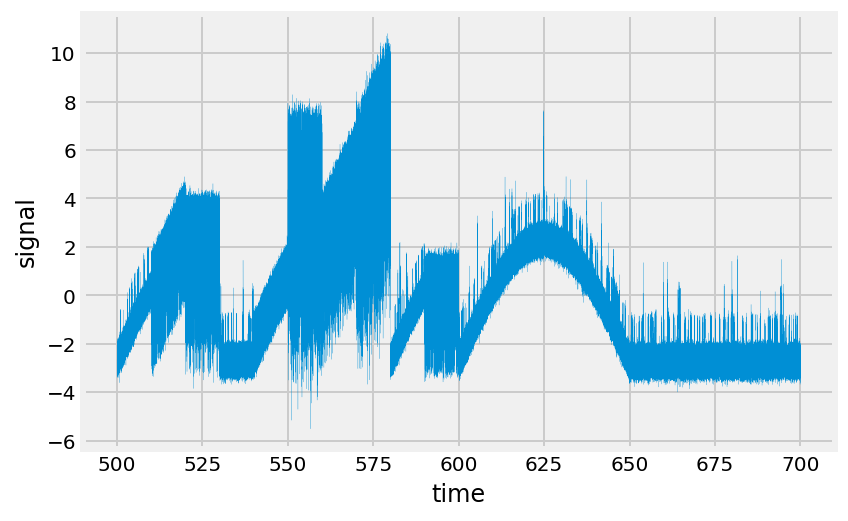

In [33]:
sns.lineplot(x="time", y="signal",data=test,linewidth=0.1)
plt.show()

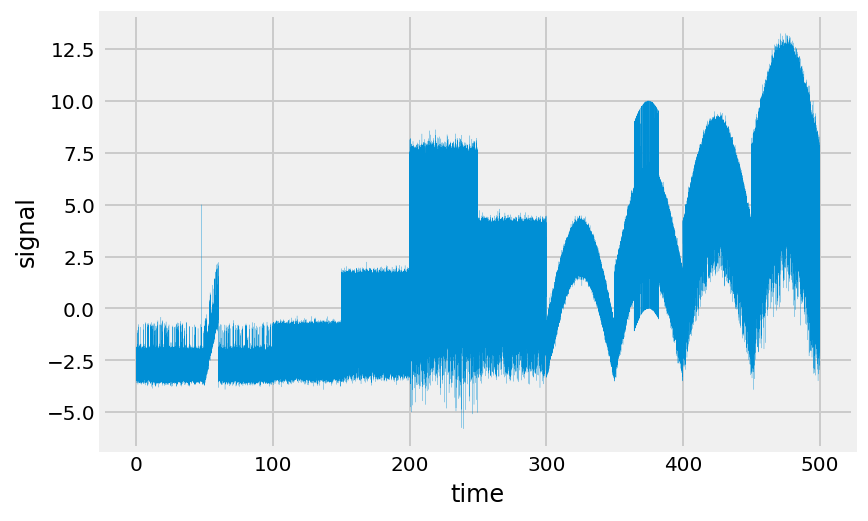

In [34]:
sns.lineplot(x="time", y="signal",data=train,linewidth=0.1)
plt.show()

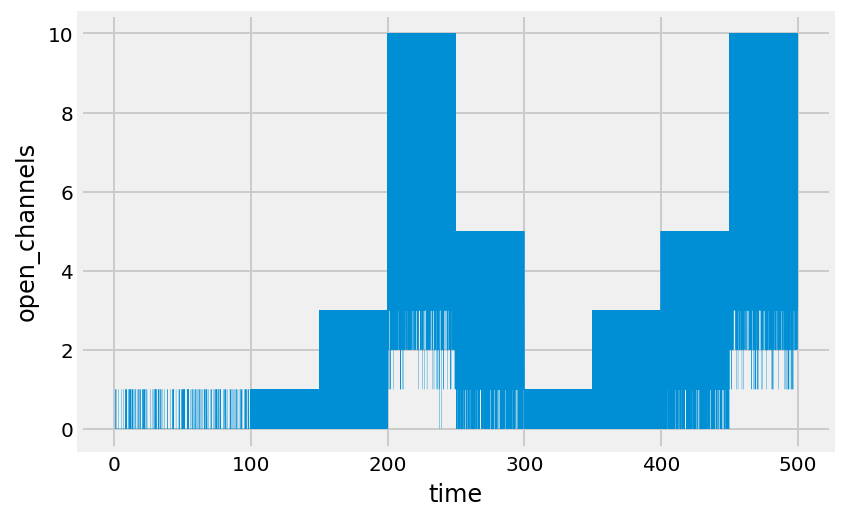

In [35]:
sns.lineplot(x="time", y="open_channels",data=train,linewidth=0.1)
plt.show()

In [31]:
train.corr()

,time,signal,open_channels
time,1.000000,0.831239,0.569601
signal,0.831239,1.000000,0.801670
open_channels,0.569601,0.801670,1.000000


In [39]:
test.corr()

,time,signal
time,1.000000,-0.421918
signal,-0.421918,1.000000
